# Hypothesis testing, composite case

*Author: Jose A. Hernando*, January 2020

*Instituto Galego de Altas Enerxías. Universidade de Santiago de Compostela, Spain.*


In [70]:
import time

print( ' Last Execution ', time.asctime())

 Last Execution  Thu Feb 15 18:16:40 2024


In [71]:
# general imports
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.optimize as optimize

# possible styles: ggplot (simplicity), bmh (scientify data), 
plt.style.context('seaborn-colorblind')

import htcore     as htcore
import httoys     as httoys
import htcatalog  as htcata
import htplot     as htplot
import htcomposite_examples as htexam
import htintro_examples  as htexam0

# ploting images
from IPython.display import display, Image

## Introduction

In this chapter we will discuss two related issues.

How extreme is a measurement $x$ respect a given parameter $\mu$, known $g(x |\mu)$?

*The response was given by FC!*

In the case there is a null hypothesis, $H_0$, and a continuous alternative hypotehesis $H_\mu$, that dependes on $\mu$, ususally if $\mu = 0$ then we get back $H_0$. When we decide we discover $H_\mu$, what is the CI that we set or exclude for $H_\mu$?

*Again the answer to this question is based on FC variable!*

We know that FC provides the method to compute the CI, but it sometimes requires **large computation simulations**. 

But we will see that there are cases where the Wilk's theorem allow us to treat the problem with **an analitic approximation.**

----

## Profile likelihood scan

We try to solve the question: Givean a measurement $x$, what is the CI that we set on a parameter $\mu$, knowing the pdg $g(x|\mu)$?

Let's consider first a simple example. The measurement follows a normal gaussian distribution with true $\mu=0$ and sigma unity. 


In [14]:
def plt_ci_interval_gaussian(mu_true = 0, nsigma = 1):
    x0 = stats.norm.rvs(size = 1, loc = mu_true)
    mu_lower = x0 - nsigma
    mu_upper = x0 + nsigma
    xs = np.arange(-6, +6, 0.01)
    htrue  = stats.norm.pdf(xs, loc = mu_true)
    hlower = stats.norm.pdf(xs, loc = mu_lower)
    hupper = stats.norm.pdf(xs, loc = mu_upper)
    plt.plot(xs, htrue, color = 'black', linestyle = 'dashed', label = "true")
    plt.plot(xs, hlower, color = 'red', label = "lower")
    sel = np.logical_and(xs >= mu_lower - nsigma, xs <= mu_lower + nsigma)
    plt.fill_between(xs[sel], 0., hlower[sel], color = 'red', alpha = 0.3);
    plt.plot(xs, hupper, color = 'green', label = "upper")
    sel = np.logical_and(xs >= mu_upper - nsigma, xs <= mu_upper + nsigma)
    plt.fill_between(xs[sel], 0., hupper[sel], color = 'green', alpha = 0.3);
    plt.plot(xs, 0.*np.arange(len(xs)), color = 'black')
    plt.scatter(x0, 0, marker = "*", s = 100)
    plt.plot((x0, x0), (0., stats.norm.pdf(x0, loc = mu_lower)), color = 'blue', linestyle = 'dashed'); 
    plt.scatter(mu_lower, 0, marker = "<", s = 100)
    plt.scatter(mu_upper, 0, marker = ">", s = 100)
    plt.xlabel(r'$\mu$ or $x$')
    plt.grid();
    plt.legend();
    return


The following figure shows the measurement, $x$, in the horizontal axis, (the star) and the gaussian pdf associated to the true.

In addition there are two other gaussian associated to normal gaussian with mean $\mu = x\pm \sigma$. 

Notice that these are the two possible gaussian that we can locate farther away with respect our measurment that fullfill that this one is still in the 68% center contaiment of the gaussian. 

In one case, for $\mu = x + \sigma$, in the left border, and in the other, with $\mu = x-\mu$ in the right border.

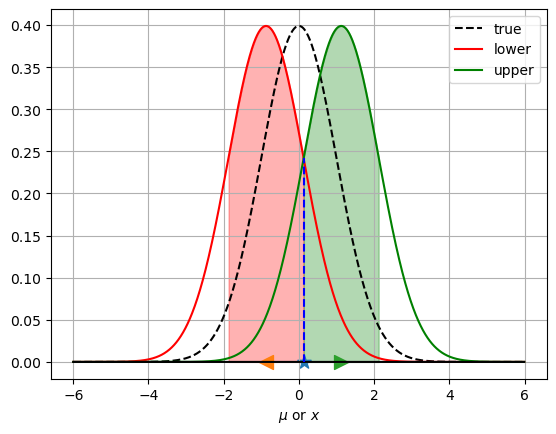

In [15]:
plt_ci_interval_gaussian()

Therefore, given a unique measurement, the best-estimate $\hat{\mu} = x$, and the CI at 68% CL is $[x-\sigma, x+\sigma]$

Let's recuperate the question in a general way:

**How extreme** a data $x$ is respect a given hypothesis $\mu$?

FC have already quatified that answer: We need to compute the distance:

$$
t_\mu( x) = -2 \ln \, \frac{ \mathcal{L}( x \, | \mu)}{ \mathcal{L}( x \, | \, \hat{\mu}( x))}
$$

Low values, close to zero, of $t_\mu(x)$ indicates "good" data. Large values of $t_\mu(x)$ indicate extreme data.

But we need to know the pdf of the distance $t_\mu$, that is $g(t_\mu | \mu)$, in order to compute the p-value of a given measurement $x$, which has an associated distance $t_\mu(x)$.


Let's note that:

$$
t_\mu(x) = -2 \log \mathcal{L}(x | \mu) + 2 \log \mathcal{L}(x | \hat{\mu}(x))
$$

It is a function of $\mu$, and it corresponds to the diference between the *minimum* $-2\log \mathcal{L}(x|\hat{\mu}(x))$ and $-2\log\mathcal{L}(x|\mu)$ at $\mu$.


Now given a measurment $x$ we estimate $\hat{\mu}(x)$ as the maximum of the $\mathcal{L}(x | \hat{\mu})$.

And the values of $t_\mu(x)$, scaning along $\mu$, is the **profile likelihood scan**.

See the example of the likelihood in the introduction chapter!

mu mean : -0.5488785243891281 , mu std : 1.0


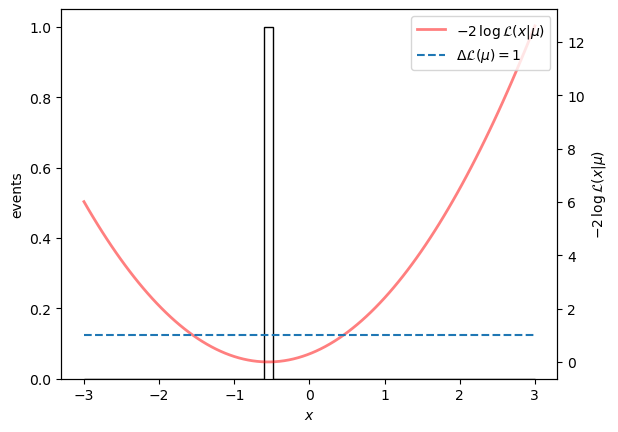

In [17]:
nsize = 1
xs = stats.norm(0., 1.).rvs(nsize)
htexam0.normal_likelihood(xs);
#plt.yscale('log');

In the example of the gaussian above:

We measure one value $x$ obtained as a random value from normal gaussian, then $\hat{\mu}(x) = x$. 

As there is only one data value, the likelihood is just the gaussian and we have:

$$
t_\mu (x) = -2 \log \mathcal{L}(x | \mu) + 2 \log \mathcal{L}(x | \hat{\mu}(x)) = \frac{(x-\mu)^2}{\sigma^2}
$$

For a given $\mu$, this expresión is, by construction, the $\chi^2(n = 1)$, for 1 dof (the degrees of $\mu$).

Notice that the values of $x$ are gaussiand distributed with mean $\mu$ and $\sigma$, therefore its normalized squared distance to the mean, $(x-\mu)^2/\sigma^2$, follows a $\chi^2(1)$ distribution!

Therefore the pdf of the $t_\mu(x)$ is the $\chi^2(1)$, a function which has tabulated p-values for each $t_\mu(x)$


For example for 68 % contaiment, the values of $x$ should be at a distance equal or less than sigma, therefore $t_\mu \le 1$. Thas is, the values of the 68 %CL CI are obtained when $t_\mu(x) = 1$

In fact, if $x = \mu + \sigma$, the value $(x-\mu)^2/\sigma^2 = 1$


Given $\mu$, the value of $x' \to t'_\mu$ that limits the 68% contaiment if

$$
\int_0^{t'_\mu} g(t_\mu | \mu) \, \mathrm{d} t_\mu = \int_0^{1} \chi^2(t | n = 1) \, \mathrm{d}t = 0.68 \, \Rightarrow \, t_\mu = 1
$$

In this example of the gaussian, given a measurement $x$ to get the 68% cover interval we scan $\mu$ till we get $t_\mu = 1$! 

There is a theorem, The Wilk's theorem, which tell us that if our data "follows a gaussian statistics", then the $t_\mu(x)$ FC variable is distributed as a $\chi^2(n)$, where $n$ is the dof of $\mu$.

In this case, there is a direct connection between the $t_\mu(x)$ that we compute from data $x$, that is the *log likelihood scan* in $\mu$, with a p-value.

In some (many) cases, the approximation that $g(t_\mu | \mu)$ follows a $\chi^2$ can be good enought.


We had used this property in *regresion*, when we obtain errors of $\hat{\mu}$ with the MLE! 

WE defined the errors, that is the CI at 68% CL, doing the log likelihood scan, and setting the values of the interval when $-2\Delta\log \mathcal{L}$ = 1, that is, the increase of $-2\log\mathcal{L}$ respect to the minimum value is 1.

In the next example, we are going to test the Wilks theorem with the case which with we started this section, the experiment of measurement $x$, one value, from a normal guassian distribution.

We fix a value of the mean value of the gaussian, $\mu$, and generate $n$ experiments, for each one we compute $hat{\mu}$ and $t_\mu(x)$. We obtain the pdf of $t_\mu(x)$ that is the normalized distribution of the $t_\mu(x)$ values of the $n$ experiment, and check that that pdf is the $\chi^2(1)$.

**Example**: Consider a gaussian distribution with mean $\mu=1$ and sigma one. Verify that $t_\mu$ is distributed with a $\chi^2(1)$.


mean muhat :  0.028432125000000055 , std 0.9545259156558356


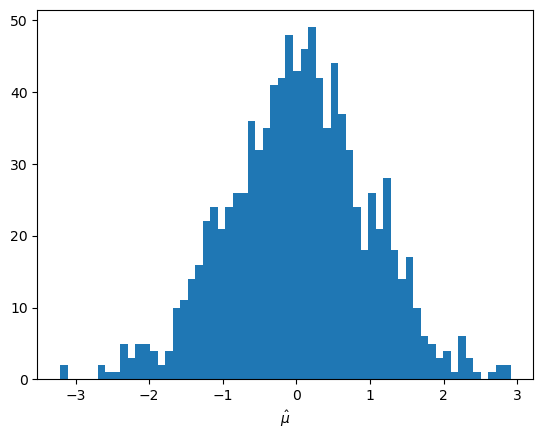

In [18]:
mu, sigma, size  = 0., 1., 1000
par, mask = (mu, sigma), (True, False)
rv        = stats.norm
xs        = rv.rvs(mu, sigma, size = size)
ht        = htcore.htcomposite(rv, par, mask = mask)
muhats    = [float(ht.mubest(xi))  for xi in xs]
tmus      = [ht.tmu(xi, mu)        for xi in xs]
print('mean muhat : ', np.mean(muhats), ', std', np.std(muhats))
plt.hist(muhats, 60); plt.xlabel(r'$\hat{\mu}$');

chi2  0.9119274817381763
p-value mean : 0.4789629717013388 ; std * sqrt(12.) : 0.9995777875665925


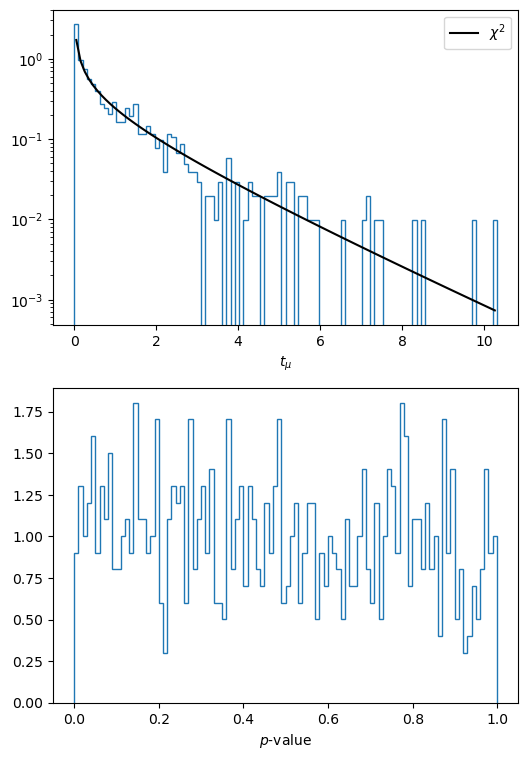

In [19]:
htplot.chi2_test(tmus, nbins = 100, label = r'$t_\mu$')

**Exercise**: Consider the case of a poisson distribution with a unknown mean $\mu$ and the null hypothesis $\mu_0$. Check for what values of $\mu$, $g(t_\mu | \mu)$ follows a $\chi^2(1)$ distribution.

**Exercise**: Consider the case of an experiment that get a sample of n-size poisson disbruted values, $x$, with a unknown mean $\mu$. Find the values of $n$ for whose $g(t_\mu | \mu)$ follows, or approximates to, a $\chi^2(1)$ distribution.

### the p-value

We are back to the construct a CI of $\mu$ at $\beta$ CL given data $x_0$.

In the "gaussian" regime, when the Wilk's theorem applies, we can use the relation between $t_\mu(x)$ and its p-value, $p_\mu$, via the $\chi^2(1)$ distribution:

$$
p_\mu = 2 \, (1 - \Phi(\sqrt{t_\mu(x)}))
$$

Where $\Phi(x)$ is the cumulative function of a normal gaussian.


We can now:

- define a CI of $\mu$ at $\beta$ CL, for those values wich $p_\mu >= 1-\beta$.

- clain discovery of $H_1(\mu_0)$ when $p_0$ has a Z-value $\ge 5$.

**Example**: Consider a gaussian distribution with fix sigma and unknown $\mu$, and the null hypothesis is $\mu_0$. Generate an observation data, $x$, and compute the CI of $\mu$ at $\beta$ CL using the $t_\mu(x_0)$ variable. Consider $\mu=3$ and $\beta = 0.68$.

In this example, we generate an experiment, where the data $x$ is the value obtained from a gaussian, in that case $\hat{\mu} = x$, we can do the scan likelihood, and obtain $t_\mu(x)$ scanning along $\mu$, and use the $t_\mu(x) \to $ p-value association, to get the function of the p-value depending on $\mu$. 

**Explore**: Change the size of the data.

In [72]:
mu, sigma, size = 0., 1., 1
par, mask       = (mu, sigma), (True, False)
rv              = stats.norm
ht              = htcore.htcomposite(rv, par, mask = mask)
x0              = rv.rvs(*par, size = size)
parbest = ht.parbest(x0) 
print('observed data ', x0, ', best par ', parbest)

observed data  [0.64378654] , best par  [0.6438125 1.       ]


mu mean : 0.6437865353419141 , mu std : 1.0


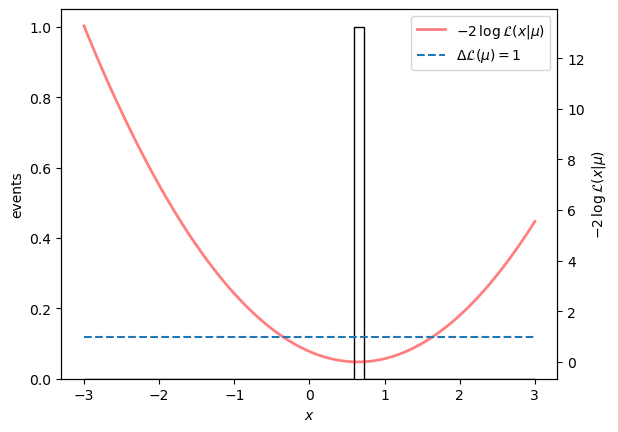

In [73]:
htexam0.normal_likelihood(x0);

central CI  : [-0.35067135  1.63824442] at  68 % CL


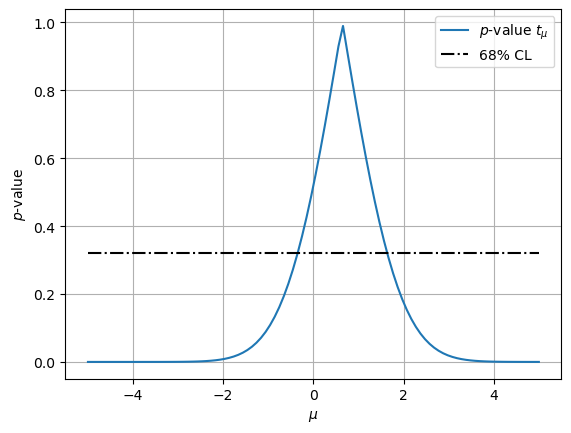

In [74]:
mu0, mu1, nmus, beta = mu-5, mu+5, 100, 0.68
mus   = np.linspace(mu0, mu1, nmus)
tmus  = [ht    .tmu(x0, mui, parbest = parbest) for mui  in mus]
ptmus = [htcore.tmu_pvalue(tmui)                for tmui in tmus]
ci     = ht.tmu_cint(x0, beta = beta)
 
htplot.prt_wilks_pvalues(beta, ci_central = ci)
htplot.plt_wilks_pvalues(beta, mus, ptmus = ptmus);

## Composite testing


Let's return to our initial problem, how to test an alternative hypothesis (a composite one) that depends continuously in a parameter $\mu$, that is $H_\mu$, with respect the default hypothesis $H_0$, where usually $\mu = 0$ implies $H_0$.

See the folowing figure, it consider that $H_0$ is a normal guassian, and $H_\mu$ a guassian centered at $\mu$ with sigma 1.

You can explore and chnage $\mu$, get an experiment, a data $x$, and compute the p-values respect both hypothesis $H_0$ and $H_\mu$



observed data : [1.04470554]
H0 p-value    : 0.14807954
H1 p-value    : 0.02527416
CLs           : 0.02966728 


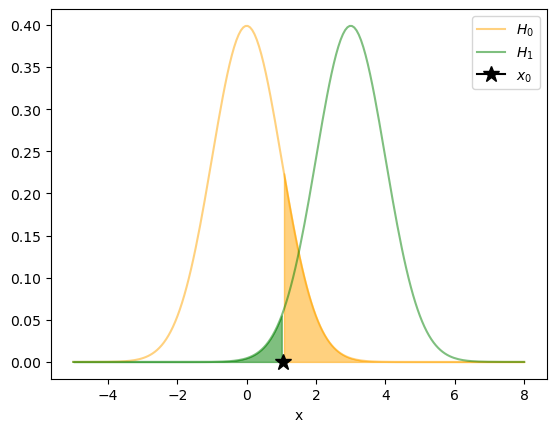

In [75]:
mu = 3.
httoys.gaussian(0., mu, sigma1 = 1.);

In this case, if the true is $\mu = 5$, you expect to clain discovery in 50% of the experiment!

observed data : [5.54175155]
H0 p-value    : 0.00000001
H1 p-value    : 0.70600516
CLs           : 0.70600518 


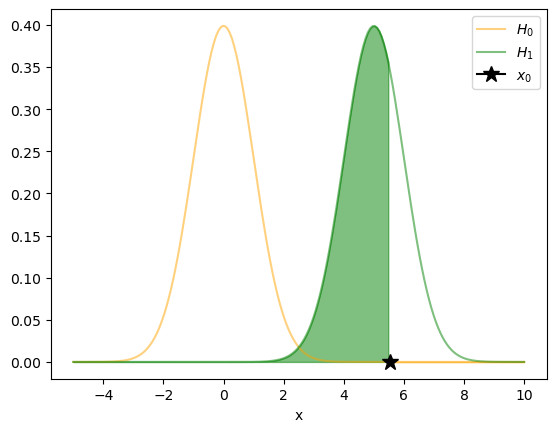

In [76]:
mu = 5.
httoys.gaussian(0., mu, sigma1 = 1., mutrue = True);

As we did with the simple hypothesis we consider two different situations:
    
    
   * Test the null hypothesis, $H_0$, we clain observation if p-value is equal of smaller thatn $5Z$
   
   
   * Test the altyernative hypothesis. Set a CI to exclude or to cover $\mu$ with $\beta$ usually 90-95% CL. The limit of the interval corresponde to the p-value of $H_\mu$ equal or smaller than $1-\beta$.

We define here the common test-statistic used in HEP to clain discovery or set CI for the strength parameter $\mu$.

### Testing the null-hypothesis

In same cases the strength parameter $\mu \ge \mu_0$, therefore the values of $\hat{\mu}(x) \lt \mu_0$ do not challenge $H_0$.

We consider than data which prefers $\mu \le \mu_0$ are by definition compatible with $H_0$. 

If we define:

$$
\lambda(\mu) = \frac{\mathcal{L}(x | \mu)}{\mathcal{L}(x | \hat{\mu}(x))}
$$

To check the compatibility with $\mu_0$, we can use:

$$
q_0 = \left\{ \begin{array}{ll}  
-2 \ln \lambda(\mu_0) & \mbox{if $\hat{\mu}(x) > \mu_0$} \\
0 & \mbox{if $\hat{\mu}(x) \le \mu_0$}
\end{array} \right. 
$$ 

Por example, in a counting experiment, if a background is $b$ counts, and the strength is $\mu$, that is, our possible signal is $b+s$.

If we observe $n \le b$, we consider that the experiment is compatible with $H_0$ by definition. Our experiment did not challenge the $H_0$ hypothesis


Now the pdf, $g(q_0 \, | \mu_0)$, will be now a "half" $\chi^2$ distribution. 

In this case there is even a simple relation with the $p$-value of $H_0$, the *goodness-of-fit* of $H_0$.

$$
p_0 = 1-\Phi(\sqrt{q_0})
$$

That translates directly into number of sigmas, $Z$:

$$
Z = \sqrt{q_0}
$$

**Example**: In the case of a gaussian hypothesis with mean $\mu$ positive and sigma one, and the null hypothesis $\mu_0 = 0$. Generate an observation data for the case $\mu_{true} = 3$ and compute the $p$-value and $Z$-value of $H_0$.

In [77]:
mu0, mutrue, sigma, size = 0., 3., 1., 1
par, mask               = (mutrue, sigma), (True, False)
x0    = stats.norm.rvs(*par, size = size)
ht    = htcore.htcomposite(stats.norm, par, mask = mask)

parbest = ht.parbest(x0)
q0      = ht.q0(x0, mu0)
p0      = htcore.q0_pvalue(q0)

print('x0 ', x0, 'parhat ', parbest)

x0  [3.14983659] parhat  [3.14985352 1.        ]


x0  [3.14983659] parhat  [3.14985352 1.        ]
q0  9.921470541954166 p-value 0.0008168090409083062 Z-value 3.1498365897224203
observed data : [3.14983659]
H0 p-value    : 0.00081681
H1 p-value    : 0.03214500
CLs           : 0.03217128 


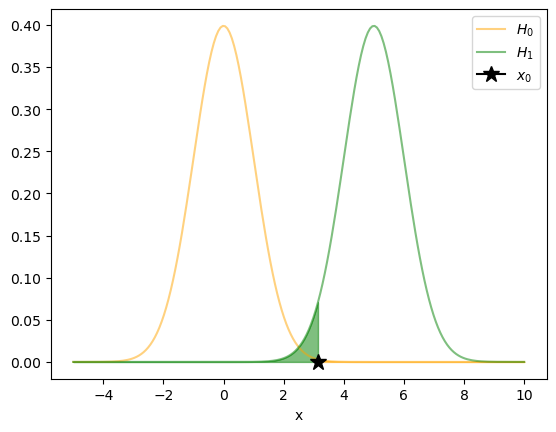

In [78]:
print('x0 ', x0, 'parhat ', parbest)
print('q0 ', q0, 'p-value', p0, 'Z-value', np.sqrt(q0))
httoys.gaussian(mu0, mu, x0 = x0, sigma1 = 1.);

**Exercise** Verify that the $q_0$ distribution is a 'half'-$\chi^2$.

### Testing the alternative hypothesis

To set a **upper** limit on the value of $\mu$, the $\hat{\mu}$ above $\mu$ do not challege the alternative hypothesis.

That means, that our data $x$, implies that $\hat{\mu}(x) \gt \mu$, we accept as valid the alternative hypothesis.

With the likelihood-ratio:

$$
\lambda(\mu) = \frac{\mathcal{L}(x | \mu)}{\mathcal{L}(x | \hat{\mu}(x))}
$$


We can now construct:

$$
q_\mu = \left\{ \begin{array}{ll} 
-2 \ln \lambda(\mu) & \mbox{if $\hat{\mu}(x) \le \mu$} \\
0 & \mbox{if $\hat{\mu}(x) \gt \mu$}
\end{array} \right.
$$



Again the pdf, $g(q_\mu | \mu)$  is a "half" $\chi^2$ distribution.

And computing p-value of the $H_1(\mu)$ hypothesis is very simple:

$$
p_\mu = 1 - \Phi(\sqrt{q_\mu})
$$

This $p_\mu$-value allow us to compute the upper limit on $\mu$ at a given $\beta$ CL.

We will set a upper limit if $H_0$ is not nullified (there is no observation), at the value of $\mu$ such that the p-value of $q_\mu$ is smaller than $\beta = 5, 10$ $.

If we can clain discovery, We can set a CI, with the best estimate $\hat{\mu}(x)$ and the interval values given by the value of $\mu$ at whose the p-value associated with $q_\mu$ is $\beta$.

**Example** Consider a gaussian distributed with mean $\mu_0 = 0$ and sigma 1. Generate an experiment, compute $q_\mu$ for $\mu = 3$. Set the upper limit on $\mu$ at 90% CL.

In [79]:
mu, mutrue, sigma, size, beta = 3., 0., 1., 1, 0.90
par, mask                 = (mutrue, sigma), (True, False)
ht  = htcore.htcomposite(stats.norm, par, mask = mask)
     
x0      = stats.norm.rvs(*par, size = size)
parbest = ht.parbest(x0)
qmu     = ht.qmu(x0, mu)
pqmu    = htcore.qmu_pvalue(qmu)
muup    = ht.qmu_ulim(x0, beta = beta)

print('x0  ', x0 , 'parbest ', parbest);

x0   [0.04529308] parbest  [0.0453125 1.       ]


x0   [0.04529308] parbest  [0.0453125 1.       ]
qmu  8.730292953918363 p-value  0.0015648310414633215  at mu  3.0
upper limit : [1.32684465] at  90 % CL
observed data : [0.04529308]
H0 p-value    : 0.48193685
H1 p-value    : 0.10000000
CLs           : 0.19302666 


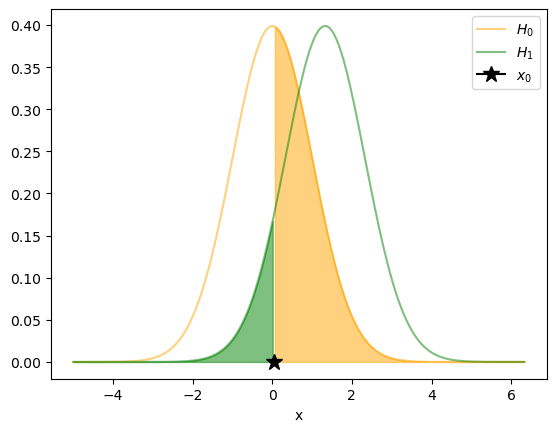

In [81]:
print('x0  ', x0 , 'parbest ', parbest);
print('qmu ', qmu, 'p-value ', pqmu, ' at mu ', mu)
htplot.prt_wilks_pvalues(beta, ci_upper = muup)

httoys.gaussian(mutrue, muup, x0 = x0, sigma1 = sigma);

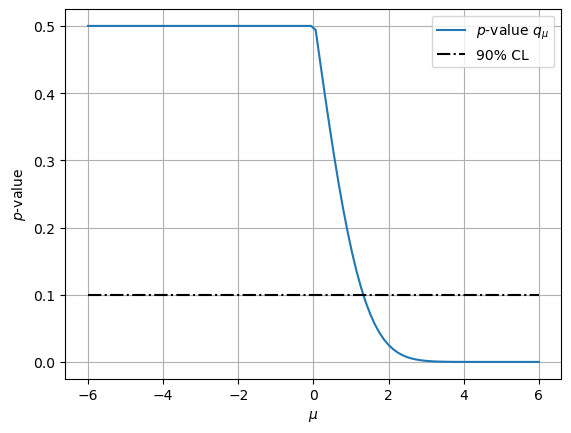

In [82]:
mu0, mu1, nmus = -6., 6., 100
mus    = np.linspace(mu0, mu1, nmus)
qmus   = [ht    .qmu(x0,  mui, parbest = parbest) for mui in mus]
pqmus  = [htcore.qmu_pvalue(qmui)               for qmui in qmus]
htplot.plt_wilks_pvalues(beta, mus, pqmus = pqmus);

**Exercise**: Consider an experiment with a gaussian distribution with mean $\mu$ and sigma 1. Consider $\mu_{true} = \mu_0 = 0$. Obtain the distribution of the upper limits at 90 %CL. 

**Exercise** Consider a experiment with a $n$ sample of gaussian distributed values with $\mu$ and sigma 1. Consider $\mu_{true} = \mu = 3.5$, verify that $q_\mu$ follows a half-$\chi^2$ distribution with one dof.

---

## Nuissance parameters 

Consider a counting experiment with a control region that is $\tau$ times larger than the signal region. In both regions the expected background events is $\nu$, while in the signal region $\nu + \mu$. 

**Explore** in the following toy the generation of some events, with different values of $\nu$, $\mu$.

We are interested on measuring $\mu$ and estimating $\nu$ from the control sample. $\nu$ is a nuisance parameter, how we can treat it?

bkg events : 47 signal events : 8


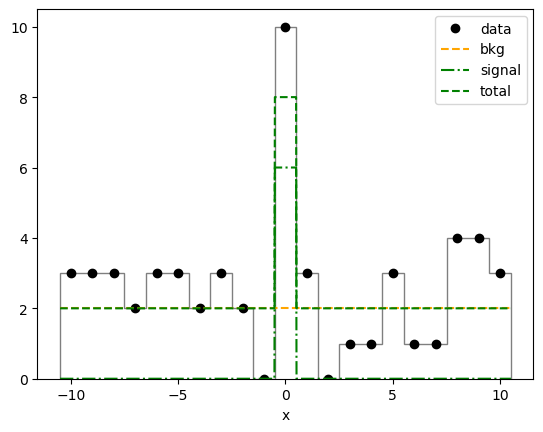

In [11]:
mu, nu, tau = 6, 2, 20
httoys.poisson_control_rvs(mu, nu, tau, tau + 1);


We can extend the likelihood to estimate the nuisance parameter, $\nu$, and use:

$$
t_\mu = -2 \ln \frac{\mathcal{L}(x \, | \mu, \, \hat{\nu}(\mu, x))}{ \mathcal{L}(x \, | \, \hat{\mu}(x), \hat{\nu} (x))}
$$

where $\hat{\nu}(x)$ is the best estimate given $x$, and $\hat{\nu}(\mu, x)$ is the best estimate when fixing $\mu$ and given $x$.


And use the test statistics $q_0$ and $q_\mu$ to test the null and the composite hypothesis and set a CI for $\mu$ using $t_\mu$.

**Example:** Consider an experiment that search for a signal $\nu+\mu$. The background, $\nu$, is measured in a independent region, called *control* region, where there is no signal, and an expected background $\tau \nu$, where $\tau$ is known. Consider $\nu$ as the nuisance parameter. The experiment observes $k$ events in the control and signal region. Consider an experiment with $k=4$, $\tau = 40$, $\nu = 2$ and $\mu = 10$. What is the range of $\mu$ excluded at 90 %CL. Compute $q_0$, is there a discovery, and observation? 


This is a prototype of a search. The pdf is:

$$
g(n, \, m \, | \, \mu, \, \nu) = \frac{(\nu+\mu )^m \, e^{-(\nu + \mu)}}{m!} \, \frac{(\tau \nu)^n \, e^{-\tau \nu}}{n!}
$$

where $m$ are the events in the signal region and $n$ are the events in the control region. 



**Exercise**: First, we check that the pdf, $g( t_\mu | \mu, \nu)$ is a $\chi^2(2)$ with two dof, and $g(t_\mu | \mu, \hat{\nu}(\mu))$ a $\chi^2(1)$ with one dof.

**Example**: Generate an observed data, $x_0$, for an experiment with a control and a signal region. The control region follows a poisson with $\tau \nu$, and the signal $\nu + \mu$. Consider the case $\tau = 20$, $\nu = 2$ and $\mu = 6$.

Compute:

a) The p-value with the null hypothesis $\mu=0$.

b) The lower value of the upper CI at 90% using $q_\mu$

c) the central CI at 90% CL using $t_\mu$

Generate an experiment, $x_0$, compute $\hat{\mu}(x_0), \, \hat{\nu}(x_0)$, and $\hat{\nu}(\mu, x_0)$ for fix $\mu$.

In [12]:
mu, nu, tau = 6., 2., 20.
par, mask, masknu  = (mu, nu, tau), (True, True, False), (False, True, False)

# generate an observation and obtain the best-estimate of mu, nu and nu given mu
rv      = htcata.poisson_control_signal
x0      = rv.rvs(*par, size =1)[0]
ht      = htcore.htcomposite(rv, par, mask = mask, masknu = masknu) 
parbest = ht.parbest(x0)
nubest  = ht.parmubest(x0, mu)

print('mu, nu true   :', mu, nu)
print('events in control, signal region :', x0[0], x0[1])
print('events in control region/tau     :', x0[0]/tau)
print('par best :', parbest)
print('par best :', nubest, ' fix mu at ', mu)

mu, nu true   : 6.0 2.0
events in control, signal region : 48.0 9.0
events in control region/tau     : 2.4
par best : [ 6.60002272  2.3999946  20.        ]
par best : [ 6.          2.40849609 20.        ]  fix mu at  6.0


Compute $t_\mu(x_0)$, $q_0(x_0)$ and $q_\mu(x_0)$ as a function of $\mu$. 

In [13]:
mu0, mu1, nmus = 2., 20., 100
mus    = np.linspace(mu0, mu1, nmus)
q0     = ht.q0(x0, 0.)
tmus   = [ht.tmu      (x0, mi, parbest = parbest) for mi in mus]
qmus   = [ht.qmu      (x0, mi, parbest = parbest) for mi in mus]

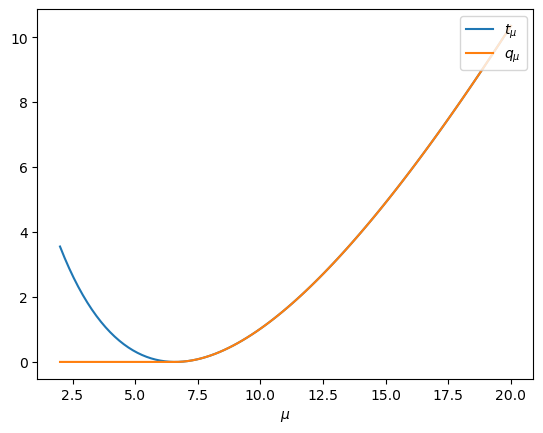

In [14]:
plt.plot(mus, tmus, label = r'$t_\mu$');
plt.plot(mus, qmus, label = r'$q_\mu$');
plt.xlabel(r'$\mu$'); plt.legend(loc = 1);

Compute p-values for $q_0(x_0)$, $t_\mu(x_0)$ and $q_\mu(x_0)$ as set a upper limit and a CI.

In [15]:
# compute the CI using tmu, and upper limit using qmu
beta = 0.90
pts = [htcore.tmu_pvalue(tmu) for tmu in tmus]
pqs = [htcore.qmu_pvalue(qmu) for qmu in qmus]
ci_upper   = ht.qmu_ulim(x0, beta = beta, parbest = parbest);
ci_central = ht.tmu_cint(x0, beta = beta, parbest = parbest);

H0 p-value  0.000890414435726905 Z-value  3.1245406944228495
upper limit : [11.03001496] at  90 % CL
central CI  : [ 2.47247899 12.49807861] at  90 % CL


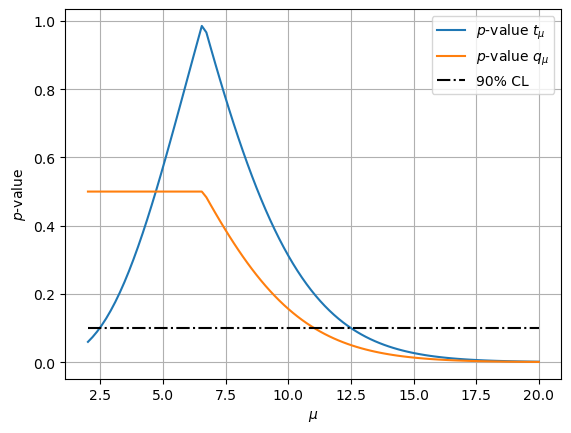

In [16]:
print('H0 p-value ', htcore.q0_pvalue(q0), 'Z-value ', np.sqrt(q0))
htplot.prt_wilks_pvalues(beta, ci_central, ci_upper)
htplot.plt_wilks_pvalues(beta, mus, pts, pqs)

**Example**: Generate now $m$ experiments, and obtain the $\hat{\mu}, \hat{\nu}$ distributions.

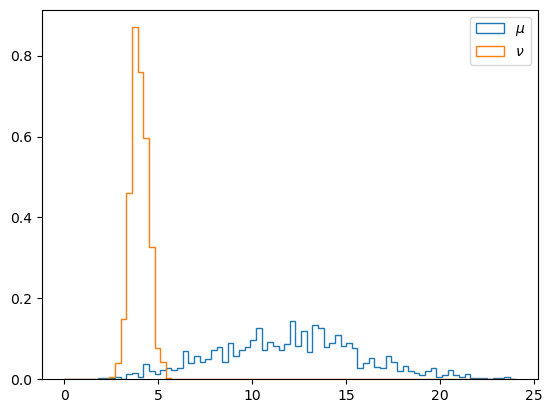

In [17]:
mu, nu, tau, size  = 12., 4., 20., 1000
htexam.poisson_control_muhat_hist(mu, nu, tau, size)

**Example** In the following plot we show the p-value of the an observed data $x_0$ in the plane $(\mu, \nu)$. They are computed assuming that $t_\mu(x)$ follows a $\chi^2$ pdf with 2 dof. The * in the plot is best-estimate point, $(\hat{\mu}(x_0), \hat{\nu}(x_0))$, and the line the best nuisance parameter $\hat{\nu}(\mu, x_0)$ as a funcion of $\mu$. 

data     : (40.0, 27.0)
best par : [22.99997005  4.00000645]
central CI : [15.24923185 32.52252449]


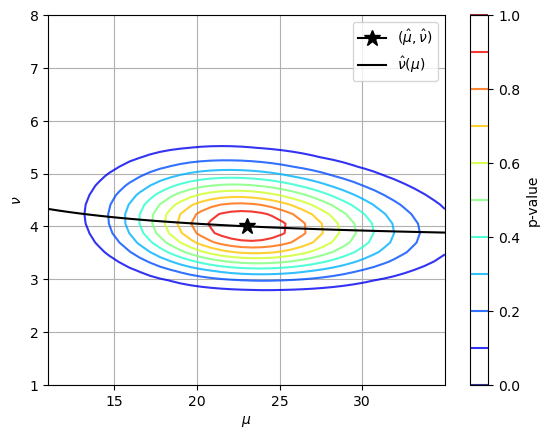

In [18]:
mu, nu, tau = 12., 4., 10.
htexam.poisson_control_ci(mu, nu, tau);

Notice that at p-value 0.1 corresponde the CI region of 90% CL and the proyection onto the $\mu$ axis in the 90% CL for the $\mu$ parameter when $\nu$ is considered a nuisance.

---